In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("job-market.csv")
df = df.dropna(how="all")

In [ ]:
classifications = df.Classification.unique()
locations = df.Location.unique()
location_Sydney = df[df.Location.eq("Sydney")]
location_Brisbane = df[df.Location=="Brisbane"]

In [164]:
list(enumerate(locations))
number_of_rows = len(locations)//3 + 1
plt.figure(figsize = (50,250))

for i in enumerate(locations):
    plt.subplot(number_of_rows, 3, i[0]+1)
    plt.tight_layout()
    location_name = df[df.Location.eq(i[1])]
    sns.countplot(y="Classification", data=location_name).set(title=i[1])

In [ ]:
#salary ranges plot

In [272]:
# categorize salary range by creating a new column called SalaryRange with conditions
conditions = [
    (df['LowestSalary'] == 0) & (df['HighestSalary'] == 30),
    (df['LowestSalary'] == 30) & (df['HighestSalary'] == 40),
    (df['LowestSalary'] == 40) & (df['HighestSalary'] == 50),
    (df['LowestSalary'] == 50) & (df['HighestSalary'] == 60)
    ]

values = ["0-30", "30-40", "40-50", "50-60"]

df['SalaryRange'] = np.select(conditions, values)

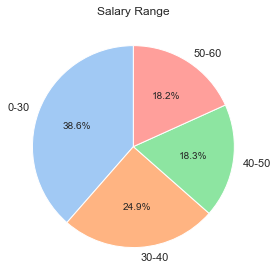

In [273]:
slices = []

# get the count of each SalaryRange, then append to slices
for i in df.SalaryRange.value_counts():
    slices.append(i)

# labels used for the pie is the same as values
labels = values
# pretty colors
colors = sns.color_palette('pastel')[0:5]

plt.pie(slices, labels = labels, startangle=90, autopct = '%1.1f%%', colors = colors)
plt.title("Salary Range")
plt.tight_layout()

In [323]:
#OPTIONAL

locationDf = df[df['Location'].isna()==False] # remove n/a by selecting rows where row's Location is not n/a
locationDf = locationDf.groupby('Location').count() # group the locationDf by count of each Location, detail of groupby() look at lab1
locationDf['Location'] = locationDf.index # for some reason we lost Location column, so we must re-create it
locationDf['Count'] = locationDf["Id"] # id here is the count value from the dfgroupby object
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Location,Count
Location,,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,238,ACT,238
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,390,Adelaide,390
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,10,Albany & Great Southern,10
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,19,Albury Area,19


In [ ]:
#OPTIONAL

%matplotlib inline
# Pie char for job market share of cities
from matplotlib import cm

In [345]:
location_temp = []

for row in locationDf['Location']:
    if row == "Sydney": location_temp.append("Sydney")
    elif row == "Melbourne": location_temp.append("Melbourne")
    elif row == "Brisbane": location_temp.append("Brisbane")
    elif row == "Perth": location_temp.append("Perth")
    elif row == "Adelaide": location_temp.append("Adelaide")
    else: location_temp.append("Others")

locationDf['location_temp'] = location_temp
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,SalaryRange,Location,Count,location_temp
Location,,,,,,,,,,,,,,,,
ACT,238,238,235,238,0,238,238,238,235,238,238,236,238,ACT,238,Others
Adelaide,390,390,356,390,0,390,390,390,374,390,390,374,390,Adelaide,390,Adelaide
Adelaide Hills & Barossa,19,19,18,19,0,19,19,19,19,19,19,19,19,Adelaide Hills & Barossa,19,Others
Albany & Great Southern,10,10,10,10,0,10,10,10,10,10,10,10,10,Albany & Great Southern,10,Others
Albury Area,19,19,18,19,0,19,19,19,19,19,19,19,19,Albury Area,19,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western QLD,19,19,19,19,0,19,19,19,19,19,19,19,19,Western QLD,19,Others
Whyalla & Eyre Peninsula,10,10,10,10,0,10,10,10,10,10,10,10,10,Whyalla & Eyre Peninsula,10,Others
"Wollongong, Illawarra & South Coast",87,87,85,87,0,87,87,87,87,87,87,87,87,"Wollongong, Illawarra & South Coast",87,Others


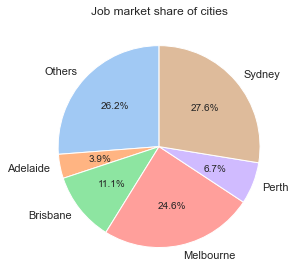

In [355]:
sum_Others = locationDf.loc[locationDf['location_temp'] == 'Others', 'Count'].sum()

slices = [sum_Others, 
          locationDf.loc['Adelaide', 'Count'], 
          locationDf.loc['Brisbane', 'Count'], 
          locationDf.loc['Melbourne', 'Count'], 
          locationDf.loc['Perth', 'Count'], 
          locationDf.loc['Sydney', 'Count']
         ]

labels = locationDf.location_temp.unique()

# pretty colors
colors = sns.color_palette('pastel')[0:6]

plt.pie(slices, labels = labels, startangle=90, autopct = '%1.1f%%', colors = colors)
plt.title("Job market share of cities")
plt.tight_layout()